In [1]:
# загрузка пакетов: инструменты -------------------------------------------- # работа с массивами 
import numpy as np 
# фреймы данных 
import pandas as pd 
# графики 
import matplotlib as mpl 
# стили и шаблоны графиков на основе matplotlib 
import seaborn as sns 
# перекодировка категориальных переменных 
from sklearn.preprocessing import LabelEncoder 
# тест Шапиро-Уилка на нормальность распределения 
from scipy.stats import shapiro 
# для таймера 
import time 
# загрузка пакетов: модели ------------------------------------------------- # линейные модели 
import sklearn.linear_model as skl_lm 
# расчёт MSE 
from sklearn.metrics import mean_squared_error
# кросс-валидация 
from sklearn.model_selection import train_test_split, LeaveOneOut 
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# ядро для генератора случайных чисел 
my_seed = 18
# создаём псевдоним для короткого обращения к графикам 
plt = mpl.pyplot 
# настройка стиля и отображения графиков 
# примеры стилей и шаблонов графиков:  
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html mpl.style.use('seaborn-whitegrid') 
sns.set_palette("Set2") 
# раскомментируйте следующую строку, чтобы посмотреть палитру 
sns.color_palette("Set2") 

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
fileURL = "https://raw.githubusercontent.com/ania607/ML/main/data/College_for_lab.csv"
DF = pd.read_csv(fileURL)
print(DF.head())

   Grad_Rate  Accept  Top10perc  Top25perc  F_Undergrad  P_Undergrad  PhD  \
0         60    1232         23         52         2885          537   70   
1         56    1924         16         29         2683         1227   29   
2         54    1097         22         50         1036           99   53   
3         59     349         60         89          510           63   92   
4         15     146         16         44          249          869   76   

   Expend Private  
0    7041     Yes  
1   10527     Yes  
2    8735     Yes  
3   19016     Yes  
4   10922     Yes  


In [4]:
# первые 10 строк фрейма
DF.head(10)

,Grad_Rate,Accept,Top10perc,Top25perc,F_Undergrad,P_Undergrad,PhD,Expend,Private
0,60,1232,23,52,2885,537,70,7041,Yes
1,56,1924,16,29,2683,1227,29,10527,Yes
2,54,1097,22,50,1036,99,53,8735,Yes
3,59,349,60,89,510,63,92,19016,Yes
4,15,146,16,44,249,869,76,10922,Yes
5,55,479,38,62,678,41,67,9727,Yes
6,63,340,17,45,416,230,90,8861,Yes
7,73,1720,37,68,1594,32,89,11487,Yes
8,80,839,30,63,973,306,79,11644,Yes
9,52,498,21,44,799,78,40,8991,Yes


In [5]:
# типы столбцов фрейма
DF.dtypes


Grad_Rate       int64
Accept          int64
Top10perc       int64
Top25perc       int64
F_Undergrad     int64
P_Undergrad     int64
PhD             int64
Expend          int64
Private        object
dtype: object

In [6]:
DF.isna().sum()

Grad_Rate      0
Accept         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
PhD            0
Expend         0
Private        0
dtype: int64

In [7]:
# кодируем категориальные переменные
private_dict = {'Yes' : 1, 'No' : 0}
DF['Private'] = DF.Private.map(private_dict)

In [8]:
DF.head(10)

,Grad_Rate,Accept,Top10perc,Top25perc,F_Undergrad,P_Undergrad,PhD,Expend,Private
0,60,1232,23,52,2885,537,70,7041,1
1,56,1924,16,29,2683,1227,29,10527,1
2,54,1097,22,50,1036,99,53,8735,1
3,59,349,60,89,510,63,92,19016,1
4,15,146,16,44,249,869,76,10922,1
5,55,479,38,62,678,41,67,9727,1
6,63,340,17,45,416,230,90,8861,1
7,73,1720,37,68,1594,32,89,11487,1
8,80,839,30,63,973,306,79,11644,1
9,52,498,21,44,799,78,40,8991,1


In [9]:
# данные для построения моделей
DF_model = DF.sample(frac = 0.8, random_state = my_seed)
# данные для прогнозов
#DF_predict = DF.drop(DF.index)
# данные для прогнозов
index_predict = DF.index.difference(DF_model.index)
DF_predict = DF.loc[index_predict]

In [10]:
# описательные статистики для непрерывных переменных
DF_model[['Grad_Rate', 'Expend', 'Top25perc', 'Private']].describe()


,Grad_Rate,Expend,Top25perc,Private
count,622.000000,622.000000,622.000000,622.000000
mean,65.710611,9709.819936,55.836013,0.741158
std,16.962681,5202.377351,19.515355,0.438351
min,15.000000,3186.000000,12.000000,0.000000
25%,54.000000,6869.500000,41.000000,0.000000
50%,65.500000,8535.000000,54.000000,1.000000
75%,78.000000,10884.750000,68.750000,1.000000
max,118.000000,56233.000000,100.000000,1.000000


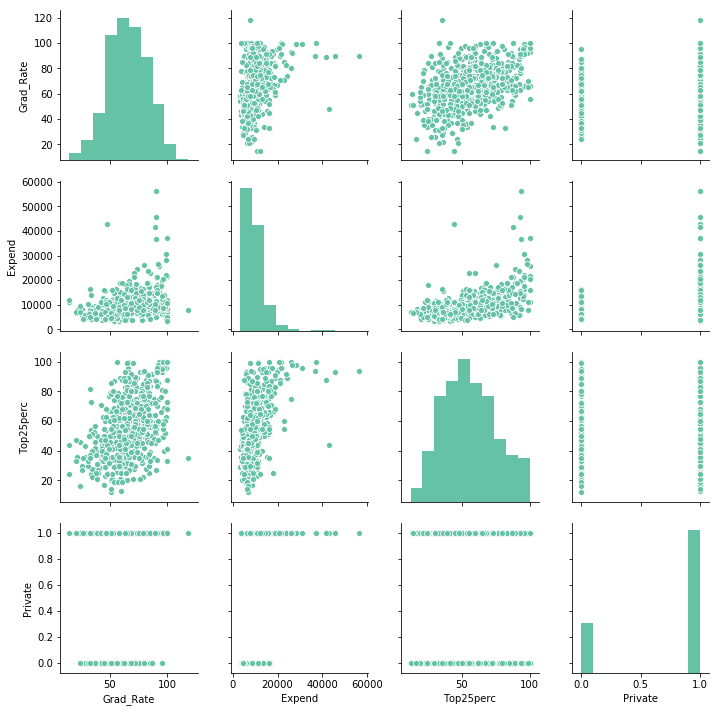

In [44]:
# Распределение и зависимость количественных данных
sns.pairplot(DF_model[['Grad_Rate', 'Expend', 'Top25perc','Private']])
plt.show()
     

C:\Anaconda\envs\env01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\envs\env01\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\envs\env01\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\envs\env01\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


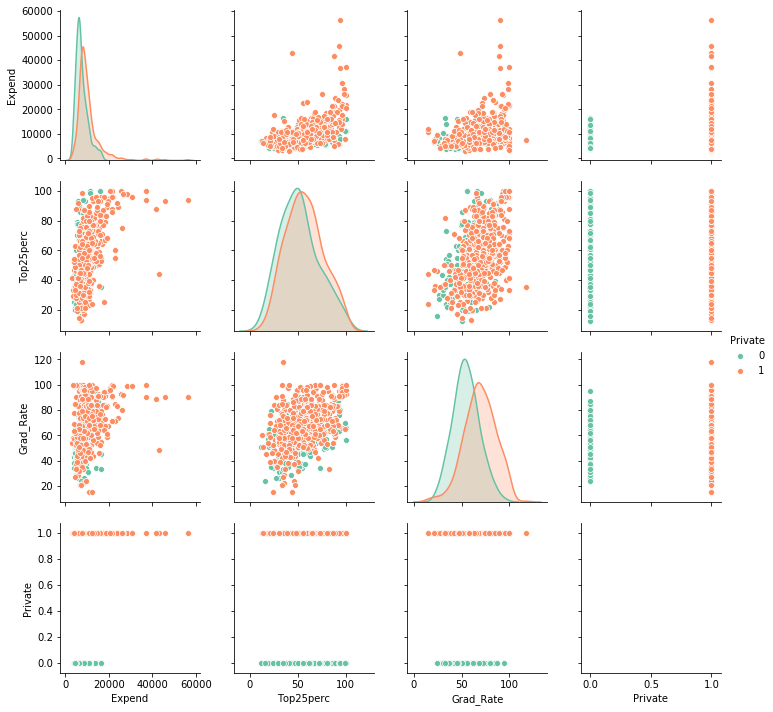

In [12]:
# матричный график разброса с цветом по приватности
sns.pairplot(DF_model[['Expend', 'Top25perc',
 'Grad_Rate','Private']], hue='Private')
plt.show()

In [13]:
DF.groupby('Private')['Expend'].value_counts()

Private  Expend
0        6433      2
         6971      2
         10912     2
         3605      1
         3752      1
         3864      1
         3871      1
         4010      1
         4078      1
         4172      1
         4222      1
         4249      1
         4329      1
         4362      1
         4417      1
         4444      1
         4469      1
         4519      1
         4525      1
         4546      1
         4550      1
         4599      1
         4602      1
         4629      1
         4632      1
         4639      1
         4696      1
         4739      1
         4776      1
         4795      1
                  ..
1        19635     1
         19733     1
         20440     1
         20447     1
         21199     1
         21227     1
         21409     1
         21424     1
         21569     1
         22014     1
         22704     1
         22906     1
         23850     1
         24386     1
         25765     1
         26037    

In [14]:
# Корреляционная матрица количественных данных
corr_mat = DF_model[['Grad_Rate','Expend', 'Top25perc']].corr().round(2)
corr_mat.style.background_gradient(cmap="coolwarm")

,Grad_Rate,Expend,Top25perc
Grad_Rate,1,0.36,0.47
Expend,0.36,1,0.51
Top25perc,0.47,0.51,1


In [45]:
# Корреляционная матрица количественных данных (для качественного стеллажа)
corr_mat = DF_model[DF_model["Private"] == 1][['Grad_Rate', 'Expend', 'Top25perc']].corr()
corr_mat.style.background_gradient(cmap="coolwarm").set_precision(2)


,Grad_Rate,Expend,Top25perc
Grad_Rate,1,0.31,0.46
Expend,0.31,1,0.53
Top25perc,0.46,0.53,1


In [46]:
# Корреляционная матрица количественных данных (для качественного стеллажа)
corr_mat = DF_model[DF_model["Private"] == 0][['Grad_Rate', 'Expend', 'Top25perc']].corr()
corr_mat.style.background_gradient(cmap="coolwarm").set_precision(2)


,Grad_Rate,Expend,Top25perc
Grad_Rate,1,0.22,0.5
Expend,0.22,1,0.46
Top25perc,0.5,0.46,1


In [47]:
# тестируем на нормальность
for col in ['Grad_Rate']:
 stat, p = shapiro(DF_model[col])
 print(col, 'Statistics=%.2f, p=%.4f' % (stat, p))
 # интерпретация
 alpha = 0.05
 if p > alpha:
     print('Распределение нормально (H0 не отклоняется)\n')
 else:
     print('Распределение не нормально (H0 отклоняется)\n')

Grad_Rate Statistics=1.00, p=0.0609
Распределение нормально (H0 не отклоняется)



In [19]:
# Данные для модели 1
df1 = DF_model[['Expend', 'Top25perc', 'Grad_Rate', 'Private']].copy()
# Данные для модели 2
df2 = DF_model[['Expend', 'Top25perc', 'Grad_Rate', 'Private']].copy()
df2.loc[:, 'Top25perc_Private'] = df2.loc[:, 'Top25perc'] * df2.loc[:, 'Private']
df2 = df2.drop(['Top25perc'], axis=1)
# Данные для модели 3
df3 = DF_model[['Expend', 'Top25perc', 'Grad_Rate', 'Private']].copy()
df3.loc[:, 'Expend_Private'] = df3.loc[:, 'Expend'] * df3.loc[:, 'Private']
df3 = df3.drop(['Expend'], axis=1)
# Данные для модели 4
df4 = DF_model[['Expend', 'Top25perc', 'Grad_Rate', 'Private']].copy()
df4.loc[:, 'Exp_Private'] = df4.loc[:, 'Expend'] * df4.loc[:, 'Private']
df4.drop(['Expend'], axis=1, inplace=True)
df4.loc[:, 'Top25perc_Private'] = df4.loc[:, 'Top25perc'] * df4.loc[:, 'Private']
df4.drop(['Top25perc'], axis=1, inplace=True)


In [20]:
lm = skl_lm.LinearRegression()

# модель со всеми объясняющими, y
X = df1.drop(['Grad_Rate'], axis=1)
y = df1.Grad_Rate.values.reshape(-1, 1)
fit_lm_1 = lm.fit(X, y)
print('модель fit_lm_0:\n',
 'константа ', np.around(fit_lm_1.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_1.coef_, 3))

модель fit_lm_0:
 константа  [35.263] 
 объясняющие  ['Expend', 'Top25perc', 'Private'] 
 коэффициенты  [[ 0.     0.343 11.824]]


In [21]:
lm = skl_lm.LinearRegression()

# модель со всеми объясняющими, y
X = df2.drop(['Grad_Rate'], axis=1)
y = df2.Grad_Rate.values.reshape(-1, 1)
fit_lm_2 = lm.fit(X, y)
print('модель fit_lm_0:\n',
 'константа ', np.around(fit_lm_2.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_2.coef_, 3))

модель fit_lm_0:
 константа  [52.302] 
 объясняющие  ['Expend', 'Private', 'Top25perc_Private'] 
 коэффициенты  [[ 0.    -5.827  0.335]]


In [22]:
lm = skl_lm.LinearRegression()

# модель со всеми объясняющими, y
X = df3.drop(['Grad_Rate'], axis=1)
y = df3.Grad_Rate.values.reshape(-1, 1)
fit_lm_3 = lm.fit(X, y)
print('модель fit_lm_0:\n',
 'константа ', np.around(fit_lm_3.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_3.coef_, 3))

модель fit_lm_0:
 константа  [37.118] 
 объясняющие  ['Top25perc', 'Private', 'Expend_Private'] 
 коэффициенты  [[0.345 9.616 0.   ]]


In [23]:
lm = skl_lm.LinearRegression()

# модель со всеми объясняющими, y
X = df4.drop(['Grad_Rate'], axis=1)
y = df4.Grad_Rate.values.reshape(-1, 1)
fit_lm_4 = lm.fit(X, y)
print('модель fit_lm_0:\n',
 'константа ', np.around(fit_lm_4.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_4.coef_, 3))

модель fit_lm_0:
 константа  [55.025] 
 объясняющие  ['Private', 'Exp_Private', 'Top25perc_Private'] 
 коэффициенты  [[-8.412  0.     0.348]]


In [24]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_1.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE


array([16412781.07365021])

In [25]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_2.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE


array([3.55121532e+09])

In [26]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_3.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE


array([9.66652525e+09])

In [27]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_4.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE


array([204.48538247])

In [28]:
# LeaveOneOut CV
loo = LeaveOneOut()
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
for df in [df1, df2, df3, df4] :
 loo.get_n_splits(df)
 X = df.drop(['Grad_Rate'], axis=1)
 y = df.Grad_Rate
 score = cross_val_score(lm, X, y, cv=loo, scoring='neg_mean_squared_error').mean()
 scores.append(score)

# таймер
toc = time.perf_counter()
print("Расчёты методом LOOCV заняли {:.2f} секунд".format(toc - tic))

Расчёты методом LOOCV заняли 3.28 секунд


In [29]:
# модели для y_log
scores_log = list()
# таймер
tic = time.perf_counter()
for df in [df1, df2, df3, df4] :
 loo.get_n_splits(df)
 X = df.drop(['Grad_Rate'], axis=1)
 y = np.log(df.Grad_Rate)
 score = cross_val_score(lm, X, y, cv=loo, n_jobs=1,
 scoring='neg_mean_squared_error').mean()
 scores_log.append(score)
# таймер
toc = time.perf_counter()
print("Расчёты методом LOOCV заняли {:.2f} секунд".format(toc - tic))


Расчёты методом LOOCV заняли 3.20 секунд


In [30]:
[np.around(-x, 2) for x in scores]

[195.24, 206.0, 195.03, 207.09]

In [31]:
# самая точная на charges
fits = ['fit_lm_1', 'fit_lm_2', 'fit_lm_3', 'fit_lm_4']
print('Наименьшая ошибка на тестовой с LOOCV у модели',
 fits[scores.index(max(scores))],
 ':\nMSE_loocv =', np.around(-max(scores), 0))


Наименьшая ошибка на тестовой с LOOCV у модели fit_lm_3 :
MSE_loocv = 195.0


In [48]:
# Перекрёстная проверка по 10 блокам
folds = 5
# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 9)
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
i = 0
for df in [df1, df2, df3, df4] :
 X = df.drop(['Grad_Rate'], axis=1)
 y = df.Grad_Rate
 kf_10 = KFold(n_splits=folds, random_state=r_state[i],
 shuffle=True)
 score = cross_val_score(lm, X, y, cv=kf_10,
 scoring='neg_mean_squared_error').mean()
 scores.append(score)
 i+=1
# таймер
toc = time.perf_counter()
print("Расчёты методом LOOCV заняли {:.2f} секунд".format(toc - tic))


Расчёты методом LOOCV заняли 0.03 секунд


In [33]:
# самая точная на charges
fits = [ 'fit_lm_1', 'fit_lm_2', 'fit_lm_3', 'fit_lm_4']
print('Наименьшая ошибка на тестовой с k-fold10 у модели',
 fits[scores.index(max(scores))],
 ':\nMSE_kf10 =', np.around(-max(scores), 0))


Наименьшая ошибка на тестовой с k-fold10 у модели fit_lm_3 :
MSE_kf10 = 195.0


In [34]:
# прогноз по fit_lm_3
# модель на всех обучающих наблюдениях
X = df3.drop(['Grad_Rate'], axis=1)
y = df3.Grad_Rate.values.reshape(-1, 1)
fit_lm_3 = lm.fit(X, y)
# значения y на отложенных наблюдениях
y = DF_predict[['Grad_Rate']].values.reshape(-1, 1)
# матрица объясняющих на отложенных наблюдениях

# Данные для модели 3
#df3 = DF_model[['Expend', 'Top25perc', 'Grad_Rate', 'Private']].copy()
#df3.loc[:, 'Expend_Private'] = df3.loc[:, 'Expend'] * df3.loc[:, 'Private']
#df3 = df3.drop(['Expend'], axis=1)


X = DF_predict[['Expend', 'Top25perc', 'Private']].copy()
X.loc[:, 'Expend_private'] = X.loc[:, 'Expend'] * X.loc[:, 'Private']
X = X.drop(['Expend'], axis=1)
# прогнозы
y_pred = fit_lm_3.predict(X)
# ошибка
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
print('MSE модели fit_lm_3 на отложенных наблюдениях = %.2f' % MSE)


MSE модели fit_lm_3 на отложенных наблюдениях = 230.38


In [50]:
# ещё раз строим на обучающей
X = df3.drop(['Grad_Rate'], axis = 1)
y = df3.Grad_Rate.values.reshape(-1, 1)
fit_lm_3 = lm.fit(X, y)
print('модель fit_lm_3:\n',
 'константа ', np.around(fit_lm_3.intercept_, 3),
 '\n объясняющие ', list(df3.drop(['Grad_Rate'], axis=1).columns.values),
 '\n коэффициенты ', np.around(fit_lm_3.coef_, 4))


модель fit_lm_3:
 константа  [42.557] 
 объясняющие  ['Private', 'Top25perc', 'Expend_private'] 
 коэффициенты  [[-2.1272e+00  3.0190e-01  9.0000e-04]]


In [42]:
# ещё раз строим на обучающей
X = df3.drop(['Grad_Rate'], axis = 1)
y = df3.Grad_Rate.values.reshape(-1, 1)
fit_lm_3 = lm.fit(X, y)
# делаем данные для модели из отложенных наблюдений
df3 = DF_predict[['Grad_Rate', 'Private', 'Top25perc', 'Expend']].copy()
df3.loc[:, 'Expend_private'] = df3.loc[:, 'Expend'] * df3.loc[:, 'Private']
df3 = df3.drop(['Expend'], axis=1)
X = df3.drop(['Grad_Rate'], axis=1)
y = df3.Grad_Rate.values.reshape(-1, 1)
# прогноз
y_pred = fit_lm_3.predict(X)
# ошибка
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
np.around(MSE, 2)


array([217.5])

In [43]:
# сравниваем ошибку со средним значением Y на отложенных
print('Ошибка модели на отложенных наблюдениях составила ',
 np.around(np.sqrt(MSE) / np.mean(y) * 100, 1)[0], '% от среднего значения Y',
 sep='')

Ошибка модели на отложенных наблюдениях составила 22.9% от среднего значения Y
